# **Problem Definition**

**Data fields**

**N** - ratio of Nitrogen content in soil

**P** - ratio of Phosphorous content in soil

**K** - ratio of Potassium content in soil

**temperature** - temperature in degree Celsius

**humidity** - relative humidity in %

**ph** - ph value of the soil

**rainfall** - rainfall in mm
Based on this variables, we will try to predict crop recommendation system for farmers,

# **Data Collection**

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('Crop_recommendation.csv')
df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [17]:
df.shape

(2200, 8)

In [9]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


# **EDA**

**Since Label is in string we need to convert it into Numeric format using one hot encoding format**

In [31]:
from sklearn.preprocessing import LabelEncoder
# Split the data into features (X) and target (y)
features = df.drop('label', axis=1)
target = df['label']

# Apply label encoding to the target variable
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Add the encoded target variable back to the DataFrame
df['label_encoded'] = target_encoded

# Print the first few rows of the resulting DataFrame
df.head(100)

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...,...
95,88,46,42,22.683191,83.463583,6.604993,194.265172,rice,20
96,93,47,37,21.533463,82.140041,6.500343,295.924880,rice,20
97,60,55,45,21.408658,83.329319,5.935745,287.576694,rice,20
98,78,35,44,26.543481,84.673536,7.072656,183.622266,rice,20


In [66]:
features.head(20)

,N,P,K,temperature,humidity,ph,rainfall,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
5,69,37,42,23.058049,83.370118,7.073454,251.055000,20
6,69,55,38,22.708838,82.639414,5.700806,271.324860,20
7,94,53,40,20.277744,82.894086,5.718627,241.974195,20
8,89,54,38,24.515881,83.535216,6.685346,230.446236,20
9,68,58,38,23.223974,83.033227,6.336254,221.209196,20


In [75]:
# Compute the correlation matrix
cleaned_feature = df.drop(columns=['label','label_encoded'])
correlation= cleaned_feature.corr()

<Axes: >

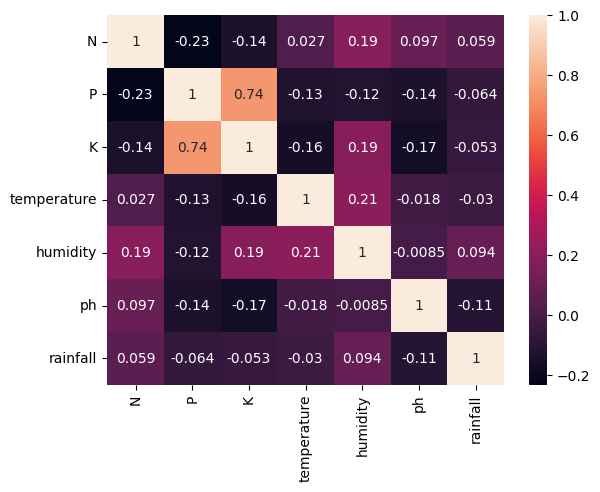

In [76]:
import seaborn as sns
sns.heatmap(correlation, annot=True, cbar=True)

In [77]:
df.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [72]:
unique_labels = df['label'].unique().size
unique_labels

22

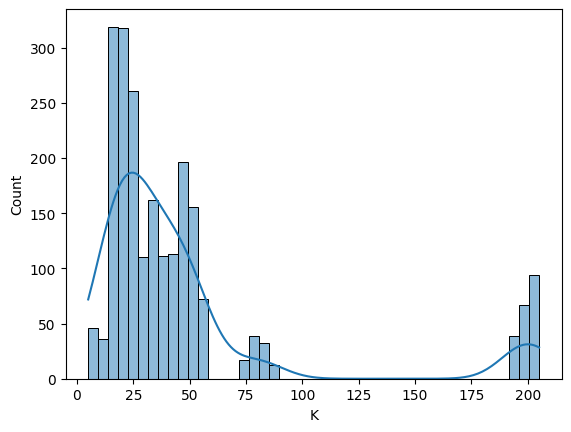

In [83]:
import matplotlib.pyplot as plt
sns.histplot(cleaned_feature['K'],kde=True)
plt.show()

# **Choosing Model**

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_feature,target_encoded, test_size=0.2, random_state=42)

In [104]:
X_train.shape

(1760, 7)

In [106]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [132]:
models={
    'LogisticRegression':LogisticRegression(),
    'GaussianNB':GaussianNB(),
    'SVC':SVC(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
}

In [133]:
for name,model in models.items():
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)
    score= accuracy_score(y_test,y_pred)
    print(name)
    print(accuracy_score(y_test,y_pred))


LogisticRegression
0.9636363636363636
GaussianNB
0.9954545454545455
SVC
0.9681818181818181
KNeighborsClassifier
0.9568181818181818
DecisionTreeClassifier
0.9863636363636363
RandomForestClassifier
0.9931818181818182


In [135]:
used_model2 = GaussianNB()
used_model2.fit(X_train,y_train)
y_pred = used_model2.predict(X_test)
accuracy_score(y_test,y_pred)

0.9954545454545455

**GaussianNB has the highest accuracy score followed by Random Forest.**

# **Testing**

In [137]:
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
    user_feature = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    scaled_user_feature = sc.transform(user_feature)
    prediction = used_model2.predict(scaled_user_feature).reshape(1,-1)
    return prediction[0]

In [138]:
df.tail(5)

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,5


In [139]:
N=107
P=34
K=32
temperature=26.7
humidity=66.4
ph=6.78
rainfall=177.7
prediction= recommendation(N,P,K,temperature,humidity,ph,rainfall)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [140]:
prediction

array([5])

# **Deployment**

**Developing a model is completed. Deployment phases can be done using various platform. For now i will use Flask to build whole system and i will use Heroku platform to deploy this webapp.**

